In [4]:
%load_ext autoreload
%autoreload 2

In [76]:
import pandas as pd
import seaborn as sns
import os
import json
import matplotlib.pyplot as plt

In [11]:
results_dir = './results/onepeace_al_retrieval_checkpoint'

In [67]:
# parse evaluation output files
steps = [1] + [i for i in range(1, 200001) if i % 20000 == 0]
slurm_output_dir = os.path.join(results_dir, 'validation_outputs/slurm_files')

gather = []
for step in steps:
    file_path = os.path.join(slurm_output_dir, f'step={step}.ckpt_log.txt')

    with open(file_path, 'r') as f:
        lines = f.readlines()

        row_dict = dict(
            time_step =  int(step)
        )

        for metric in lines[-2].split(','):
            split_line = metric.strip('\n').split(':')
            row_dict[split_line[0].strip()] = float(split_line[1].strip())

        gather.append(row_dict)

gather


[{'time_step': 1, 'SDR': -3.244, 'SDRi': -3.279, 'SISDR': -23.695},
 {'time_step': 20000, 'SDR': 2.151, 'SDRi': 2.116, 'SISDR': -0.148},
 {'time_step': 40000, 'SDR': 3.03, 'SDRi': 2.995, 'SISDR': 1.388},
 {'time_step': 60000, 'SDR': 3.659, 'SDRi': 3.624, 'SISDR': 1.558},
 {'time_step': 80000, 'SDR': 4.114, 'SDRi': 4.079, 'SISDR': 2.19},
 {'time_step': 100000, 'SDR': 4.32, 'SDRi': 4.285, 'SISDR': 2.596},
 {'time_step': 120000, 'SDR': 4.411, 'SDRi': 4.376, 'SISDR': 2.635},
 {'time_step': 140000, 'SDR': 5.084, 'SDRi': 5.049, 'SISDR': 3.284},
 {'time_step': 160000, 'SDR': 4.636, 'SDRi': 4.601, 'SISDR': 2.768},
 {'time_step': 180000, 'SDR': 4.958, 'SDRi': 4.923, 'SISDR': 3.069},
 {'time_step': 200000, 'SDR': 4.791, 'SDRi': 4.756, 'SISDR': 2.48}]

In [68]:
df = pd.DataFrame(gather)
df.to_csv(os.path.join(results_dir, 'validation_results.csv'), index=False)

In [69]:
df = pd.read_csv(os.path.join(results_dir, 'validation_results.csv'))
df

,time_step,SDR,SDRi,SISDR
0,1,-3.244,-3.279,-23.695
1,20000,2.151,2.116,-0.148
2,40000,3.030,2.995,1.388
3,60000,3.659,3.624,1.558
4,80000,4.114,4.079,2.190
5,100000,4.320,4.285,2.596
6,120000,4.411,4.376,2.635
7,140000,5.084,5.049,3.284
8,160000,4.636,4.601,2.768
9,180000,4.958,4.923,3.069


In [70]:
df.columns

Index(['time_step', 'SDR', 'SDRi', 'SISDR'], dtype='object')

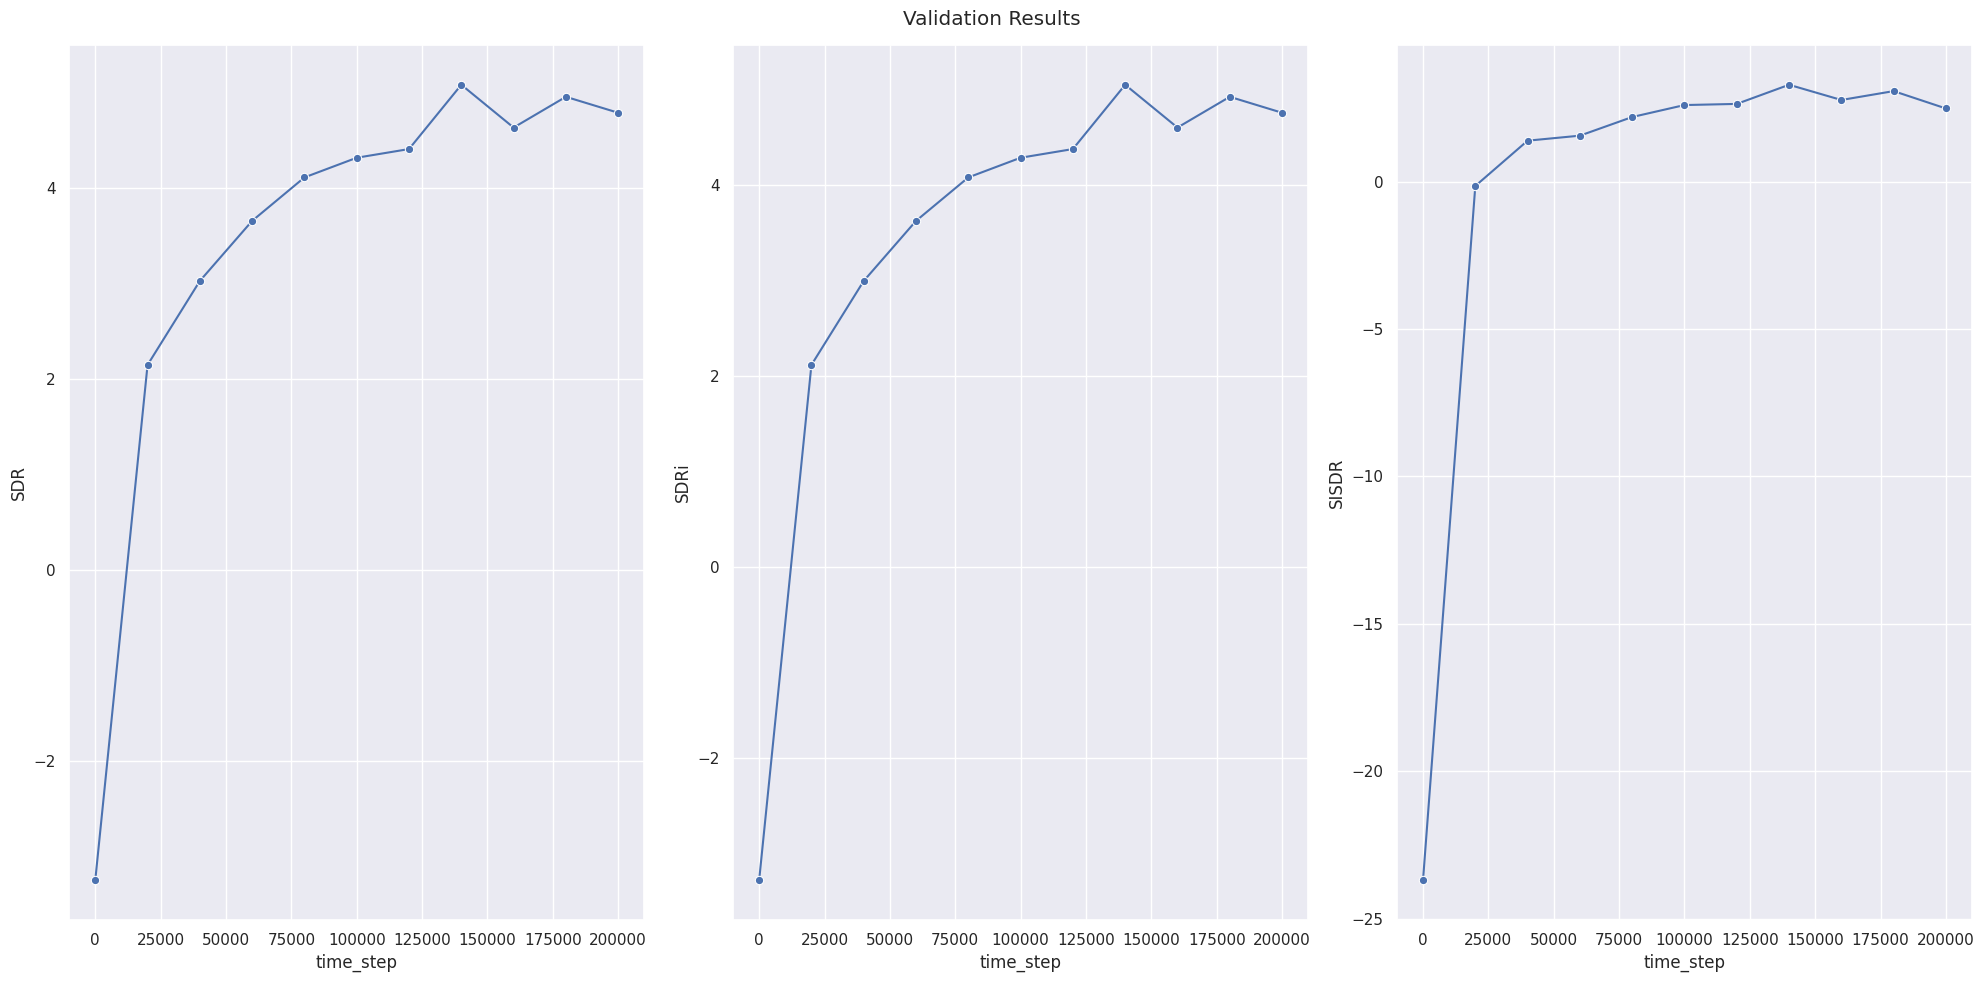

In [86]:
sns.set_theme()
fig, axes = plt.subplots(1,3, figsize = (20,10))
plt.tight_layout()

sns.lineplot(df, 
             x='time_step', 
             y = 'SDR',  
             marker='o',
             ax = axes[0])


sns.lineplot(df, 
            x='time_step', 
            y = 'SDRi',  
            marker='o',
            ax = axes[1])

sns.lineplot(df, 
             x='time_step', 
             y = 'SISDR',  
             marker='o',
             ax = axes[2])


# for ax in axes:
#     ax.set_xticklabels(ax.get_xticklabels(), rotation=20, ha="right")

plt.suptitle('Validation Results')
plt.tight_layout()